In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as st

In [2]:
def normal(ax, mu, sigma):
    x = np.linspace(mu-5, mu+5, 1000)
    pdf = st.norm.pdf(x, mu, sigma)
    ax.plot(x, pdf, label=f'$\mu$ = {mu}, $\sigma$ = {sigma}')
def uniform(ax, lower, upper):
    x = np.linspace(lower-10, upper+10, 1000)
    y = np.zeros(1000)
    y[(x<upper) & (x>lower)] = 1.0/(upper-lower)
    ax.plot(x,y)

# Test executed 2020 - 08 - 02

In [8]:
cs = pd.read_csv("Outputs/2020-08-02.csv", sep="!")
best = cs.sort_values(by="MUTUAL_INFO", ascending=False).drop_duplicates(subset="MUTUAL_INFO")
best

,N,AGE,NAME,MUTUAL_INFO
3,20,"['Normal', -9589.498199264528, 0.1]","['BetaBinomial', 1, 0.001, 0.001]",[4.05223179]
0,20,"['Normal', 0.0, 0.1]","['BetaBinomial', 1, 0.001, 0.001]",[4.04985109]
17,20,"['Normal', -8683.136304890035, 0.1]","['BetaBinomial', 1, 0.001, 0.001]",[4.04271525]
7,20,"['Normal', 2973.0493843392396, 0.1]","['BetaBinomial', 1, 0.001, 0.001]",[4.03505961]
5,20,"['Normal', 9987.801024948996, 0.1]","['BetaBinomial', 1, 0.001, 0.001]",[4.0200935]
...,...,...,...,...
194,20,"['Normal', -6912.1791469014415, 7675.487790361...","['BetaBinomial', 314, 7675.464777460519, 324.8...",[0.00083585]
68,20,"['Normal', -2308.077241471174, 3729.5028457749...","['Geometric', 0.373533775602217]",[0.00066527]
93,20,"['Normal', 18.61645259604972, 3005.0881919360727]","['Binomial', 3849, 0.7079508646007829]",[0.00056428]
128,20,"['Normal', 24.15262456744616, 1620.746584444763]","['Geometric', 0.5467647724167736]",[0.00050363]


[4.05223179, 4.04985109, 4.04271525]
[4.05223179, 4.04985109, 4.04271525]
[4.05223179, 4.04985109, 4.04271525]
["Normal'", ' -9589.498199264528', ' 0.1']
["Normal'", ' 0.0', ' 0.1']
["Normal'", ' -8683.136304890035', ' 0.1']


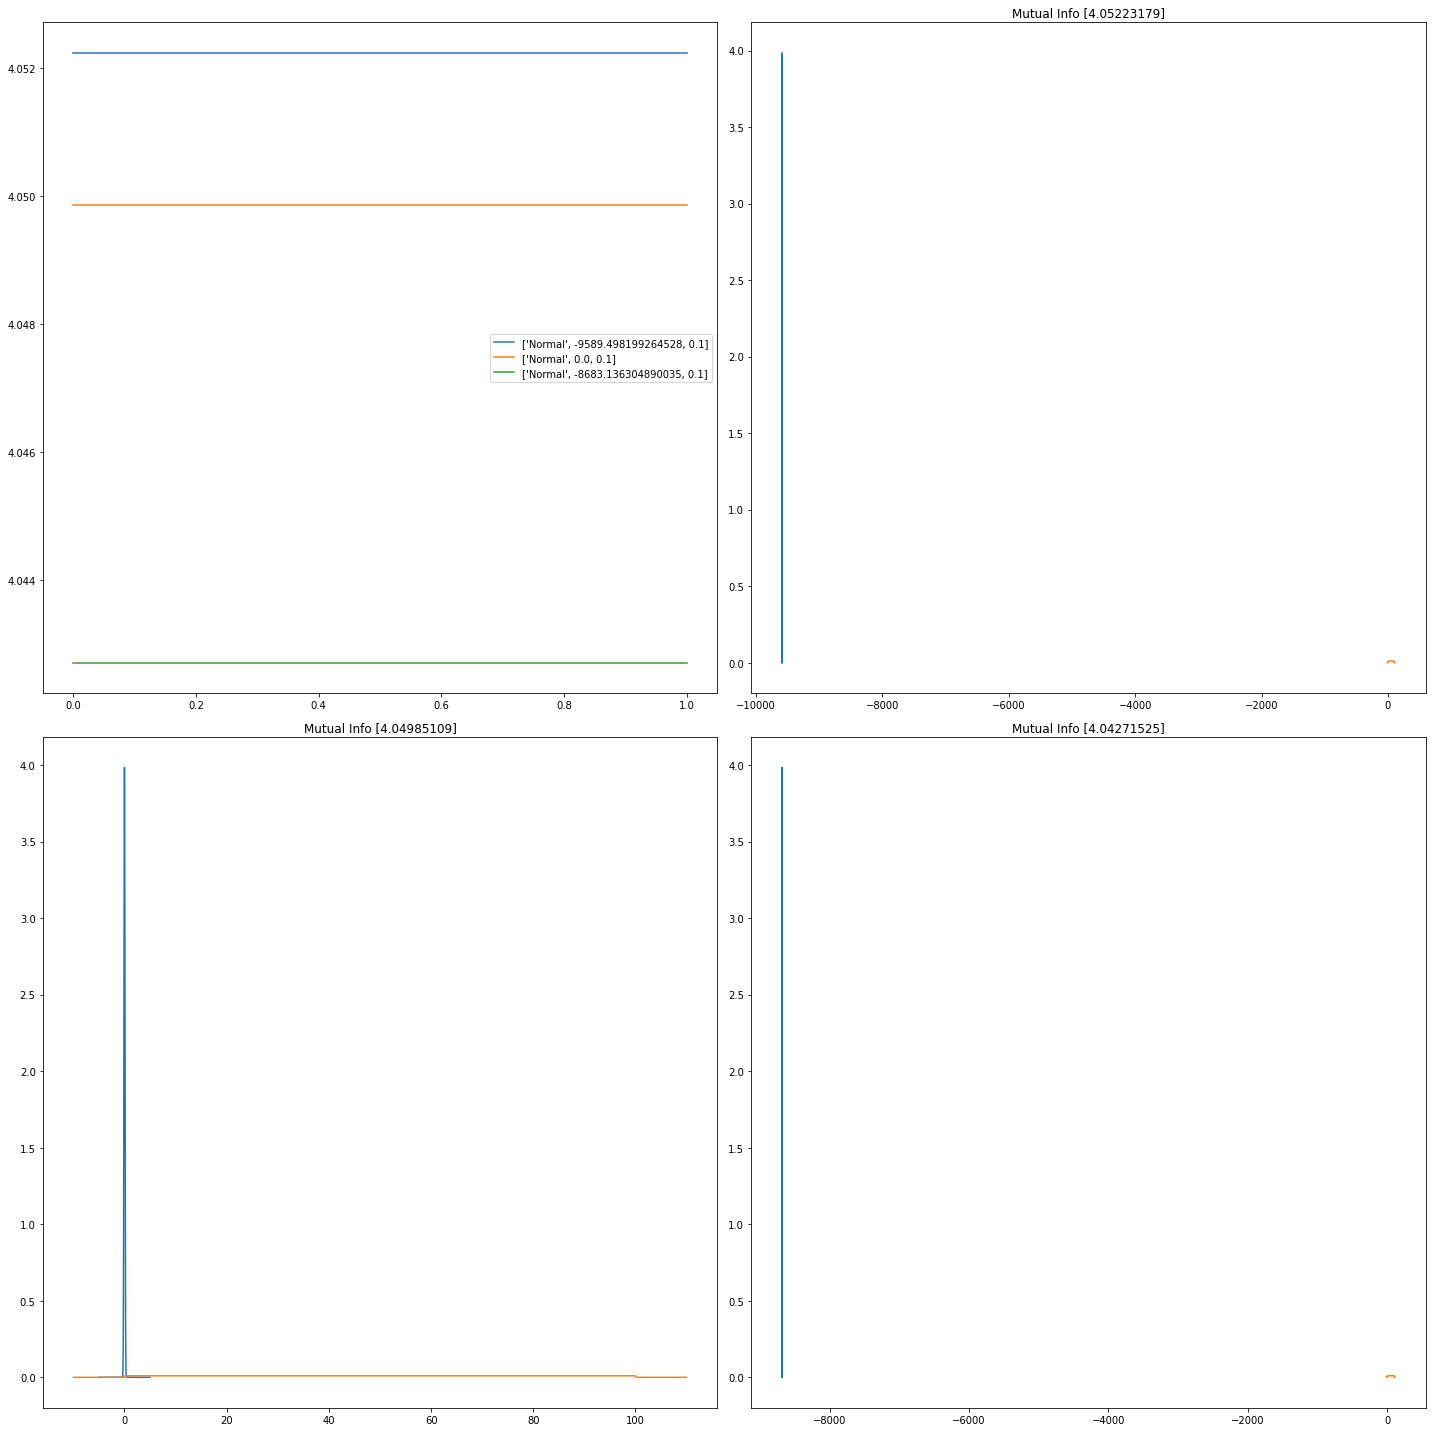

In [6]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
top = 3
info = [float(i) for i in best["MUTUAL_INFO"].str.strip("[]").head(top)]
for i in range(top):
    print(info)
    lab = best["AGE"].iloc[i]
    ax[0,0].plot(np.linspace(0,1,100),np.linspace(info[i],info[i],100), label=f"{lab}")
ax[0,0].legend(loc=0)
aks = [ax[0,1],ax[1,0],ax[1,1]]
for i in range(top):
    info_age = best["AGE"].iloc[i].strip("[]'").split(",")
    print(info_age)
    if info_age[0] == "Normal\'":
        normal(aks[i], float(info_age[1]), float(info_age[2]))
    aks[i].set_title(f"Mutual Info {best['MUTUAL_INFO'].iloc[i]}")
    uniform(aks[i],0,100)
plt.tight_layout()

# First full execution 2020 - 08 - 03

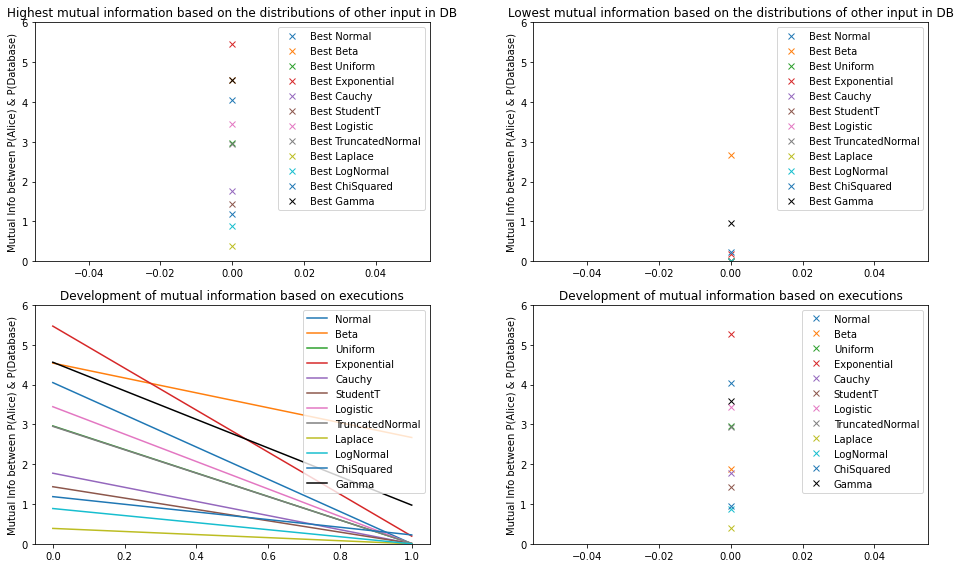

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as st

df = pd.read_csv("Outputs/output_mutual_info_long_run.csv", sep="!")

df = df.sort_values(by=["INFO"], ascending=False)

normals = df[df["DIST"].str.startswith("Normal")]
beta = df[df["DIST"].str.startswith("Beta")]
uniform = df[df["DIST"].str.startswith("Uniform")]
exponential = df[df["DIST"].str.startswith("Exponential")]
cauchy = df[df["DIST"].str.startswith("Cauchy")]
studentt = df[df["DIST"].str.startswith("StudentT")]
logistic = df[df["DIST"].str.startswith("Logistic")]
truncatednormal = df[df["DIST"].str.startswith("TruncatedNormal")]
laplace = df[df["DIST"].str.startswith("Laplace")]
lognormal = df[df["DIST"].str.startswith("LogNormal")]
chisquared = df[df["DIST"].str.startswith("ChiSquared")]
gamma = df[df["DIST"].str.startswith("Gamma")]


fig, ax = plt.subplots(2,2, figsize=(14,8))

# Best distributions
ax[0,0].plot([0], normals["INFO"].head(1), "x", label="Best Normal")
ax[0,0].plot([0], beta["INFO"].head(1), "x", label="Best Beta")
ax[0,0].plot([0], uniform["INFO"].head(1), "x", label="Best Uniform")
ax[0,0].plot([0], exponential["INFO"].head(1), "x", label="Best Exponential")
ax[0,0].plot([0], cauchy["INFO"].head(1), "x", label="Best Cauchy")
ax[0,0].plot([0], studentt["INFO"].head(1), "x", label="Best StudentT")
ax[0,0].plot([0], logistic["INFO"].head(1), "x", label="Best Logistic")
ax[0,0].plot([0], truncatednormal["INFO"].head(1), "x", label="Best TruncatedNormal")
ax[0,0].plot([0], laplace["INFO"].head(1), "x", label="Best Laplace")
ax[0,0].plot([0], lognormal["INFO"].head(1), "x", label="Best LogNormal")
ax[0,0].plot([0], chisquared["INFO"].head(1), "x", label="Best ChiSquared")
ax[0,0].plot([0], gamma["INFO"].head(1), "x", label="Best Gamma", color=(0,0,0))

ax[0,0].set_ylim(0,6)
ax[0,0].set_ylabel("Mutual Info between P(Alice) & P(Database)")
ax[0,0].set_title("Highest mutual information based on the distributions of other input in DB")
ax[0,0].legend()
# Worst distributions
ax[0,1].plot([0], normals["INFO"].tail(1), "x", label="Best Normal")
ax[0,1].plot([0], beta["INFO"].tail(1), "x", label="Best Beta")
ax[0,1].plot([0], uniform["INFO"].tail(1), "x", label="Best Uniform")
ax[0,1].plot([0], exponential["INFO"].tail(1), "x", label="Best Exponential")
ax[0,1].plot([0], cauchy["INFO"].tail(1), "x", label="Best Cauchy")
ax[0,1].plot([0], studentt["INFO"].tail(1), "x", label="Best StudentT")
ax[0,1].plot([0], logistic["INFO"].tail(1), "x", label="Best Logistic")
ax[0,1].plot([0], truncatednormal["INFO"].tail(1), "x", label="Best TruncatedNormal")
ax[0,1].plot([0], laplace["INFO"].tail(1), "x", label="Best Laplace")
ax[0,1].plot([0], lognormal["INFO"].tail(1), "x", label="Best LogNormal")
ax[0,1].plot([0], chisquared["INFO"].tail(1), "x", label="Best ChiSquared")
ax[0,1].plot([0], gamma["INFO"].tail(1), "x", label="Best Gamma", color=(0,0,0))

ax[0,1].set_ylim(0,6)
ax[0,1].set_ylabel("Mutual Info between P(Alice) & P(Database)")
ax[0,1].set_title("Lowest mutual information based on the distributions of other input in DB")
ax[0,1].legend()

#Development between best and worst plot:
ax[1,0].plot([0,1], [normals["INFO"].head(1),normals["INFO"].tail(1)], label="Normal")
ax[1,0].plot([0,1], [beta["INFO"].head(1),beta["INFO"].tail(1)], label="Beta")
ax[1,0].plot([0,1], [uniform["INFO"].head(1),uniform["INFO"].tail(1)], label="Uniform")
ax[1,0].plot([0,1], [exponential["INFO"].head(1),exponential["INFO"].tail(1)], label="Exponential")
ax[1,0].plot([0,1], [cauchy["INFO"].head(1),cauchy["INFO"].tail(1)], label="Cauchy")
ax[1,0].plot([0,1], [studentt["INFO"].head(1),studentt["INFO"].tail(1)], label="StudentT")
ax[1,0].plot([0,1], [logistic["INFO"].head(1),logistic["INFO"].tail(1)], label="Logistic")
ax[1,0].plot([0,1], [truncatednormal["INFO"].head(1),truncatednormal["INFO"].tail(1)], label="TruncatedNormal")
ax[1,0].plot([0,1], [laplace["INFO"].head(1),laplace["INFO"].tail(1)], label="Laplace")
ax[1,0].plot([0,1], [lognormal["INFO"].head(1),lognormal["INFO"].tail(1)], label="LogNormal")
ax[1,0].plot([0,1], [chisquared["INFO"].head(1),chisquared["INFO"].tail(1)], label="ChiSquared")
ax[1,0].plot([0,1], [gamma["INFO"].head(1),gamma["INFO"].tail(1)], label="Gamma", color=(0,0,0))

ax[1,0].set_ylim(0,6)
ax[1,0].set_ylabel("Mutual Info between P(Alice) & P(Database)")
ax[1,0].set_title("Development of mutual information based on executions")
ax[1,0].legend()


#Diff plot
ax[1,1].plot([0], [float(normals["INFO"].head(1))-float(normals["INFO"].tail(1))],"x", label="Normal")
ax[1,1].plot([0], [float(beta["INFO"].head(1))-float(beta["INFO"].tail(1))],"x", label="Beta")
ax[1,1].plot([0], [float(uniform["INFO"].head(1))-float(uniform["INFO"].tail(1))],"x", label="Uniform")
ax[1,1].plot([0], [float(exponential["INFO"].head(1))-float(exponential["INFO"].tail(1))],"x", label="Exponential")
ax[1,1].plot([0], [float(cauchy["INFO"].head(1))-float(cauchy["INFO"].tail(1))],"x", label="Cauchy")
ax[1,1].plot([0], [float(studentt["INFO"].head(1))-float(studentt["INFO"].tail(1))],"x", label="StudentT")
ax[1,1].plot([0], [float(logistic["INFO"].head(1))-float(logistic["INFO"].tail(1))],"x", label="Logistic")
ax[1,1].plot([0], [float(truncatednormal["INFO"].head(1))-float(truncatednormal["INFO"].tail(1))],"x", label="TruncatedNormal")
ax[1,1].plot([0], [float(laplace["INFO"].head(1))-float(laplace["INFO"].tail(1))],"x", label="Laplace")
ax[1,1].plot([0], [float(lognormal["INFO"].head(1))-float(lognormal["INFO"].tail(1))],"x", label="LogNormal")
ax[1,1].plot([0], [float(chisquared["INFO"].head(1))-float(chisquared["INFO"].tail(1))],"x", label="ChiSquared")
ax[1,1].plot([0], [float(gamma["INFO"].head(1))-float(gamma["INFO"].tail(1))],"x", label="Gamma", color=(0,0,0))

ax[1,1].set_ylim(0,6)
ax[1,1].set_ylabel("Mutual Info between P(Alice) & P(Database)")
ax[1,1].set_title("Development of mutual information based on executions")
ax[1,1].legend()


# Plot
plt.legend()
plt.tight_layout()
plt.show()

# Evaluation
Based on the above figure it becomes evident that even though the best mutual information occurs with exponential, it is also the PDF that has the highest difference between its best and worst paramter.
Therefore assuming that the exact parameter/range of the distributions is unknown, it would be safer to make use of the beta distributions while still testing if such a distribution can reach a higher distributions.



### So is the method differentially private?
The answer is actually quite simple. No. Given that we are trying to find Alice. And after feeding it multiple distributions to the "encryption" method, there are still a very high correlation between the original alice and the output.